In [36]:
import numpy as np
import pandas as pd
import seaborn as sns

In [37]:
features = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/AI-class-main/titanic.csv", index_col = 0)

In [38]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [40]:
features.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'Label')

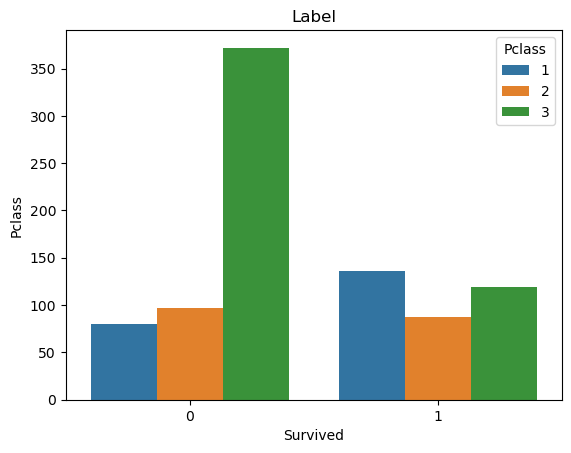

In [41]:
sns.countplot(data = features, x="Survived", hue="Pclass")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.title("Label")

Text(0.5, 1.0, 'Label')

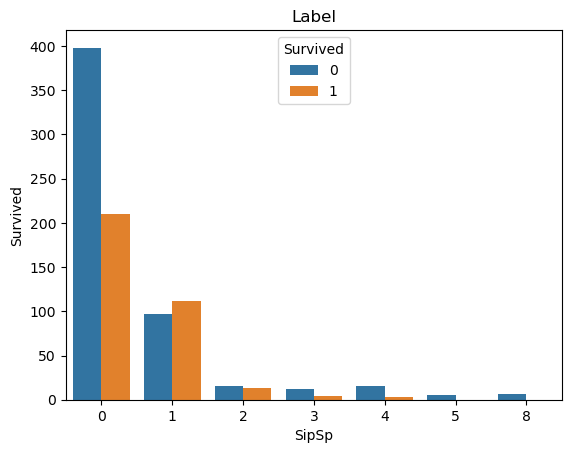

In [42]:
sns.countplot(data = features, x="SibSp", hue="Survived")
plt.xlabel("SipSp")
plt.ylabel("Survived")
plt.title("Label")

0    549
1    342
Name: Survived, dtype: int64

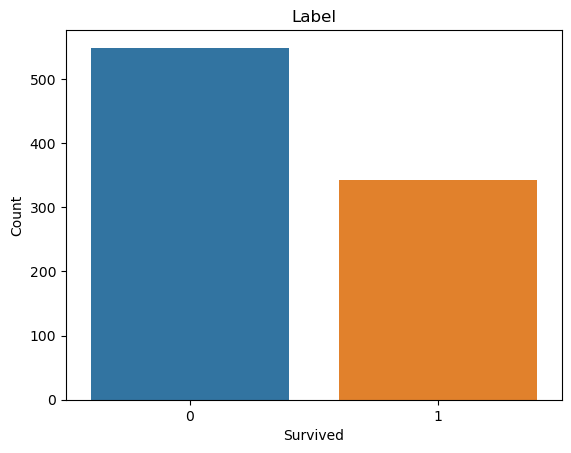

In [43]:
sns.countplot(data = features, x="Survived")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.title("Label")
features['Survived'].value_counts()

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features['Sex'] = le.fit_transform(features['Sex'])

<AxesSubplot:title={'center':'label'}>

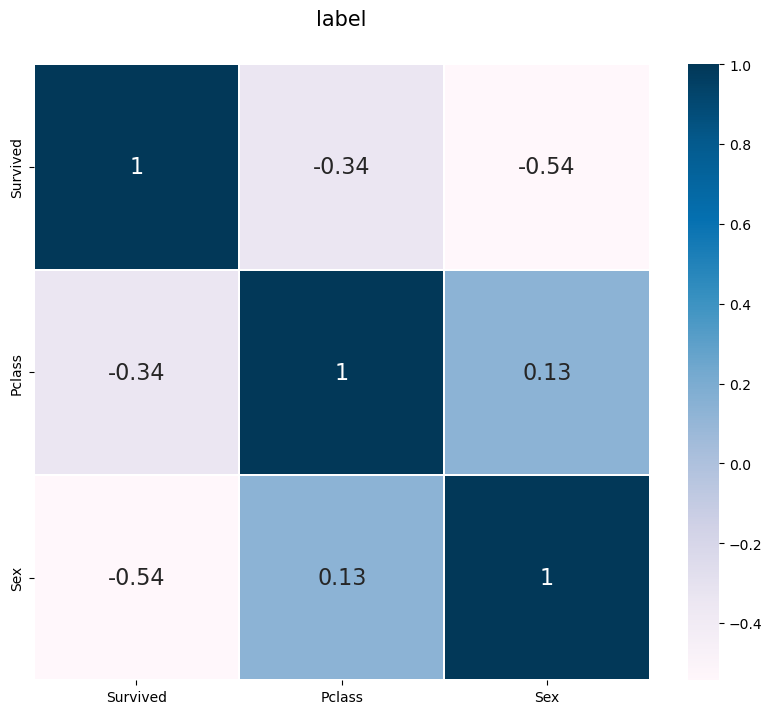

In [45]:
features_data = features[["Survived", "Pclass", "Sex"]]
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("label", y = 1.05, size = 15)
sns.heatmap(features_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [46]:
X = features
X = X.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
X = X.dropna(axis=0)
y = X['Survived']
X = X.drop('Survived', axis=1)

In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.6536312849162011
[[90 13]
 [49 27]]


In [51]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.8212290502793296
[[88 15]
 [17 59]]


In [52]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7988826815642458
[[85 18]
 [18 58]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.8044692737430168
[[88 15]
 [20 56]]


0.6256983240223464
[[74 29]
 [38 38]]


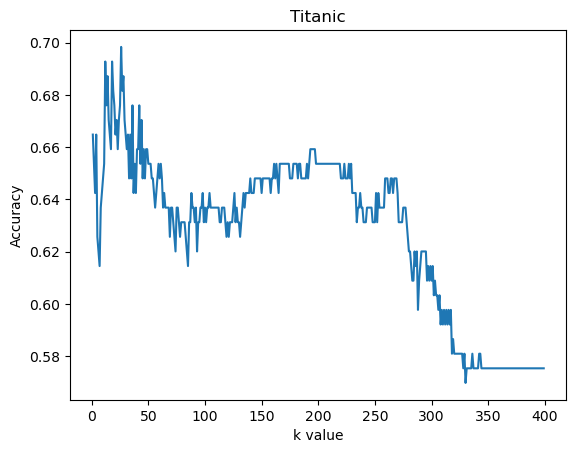

In [54]:
import matplotlib.pyplot as plt

find_model = KNeighborsClassifier()
find_model.fit(X_train, y_train.values.ravel())

pred_dt = find_model.predict(X_test)
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


k_range = range(1, 400)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Titanic")
plt.show()